In [1]:
__imp

Libraries have been loaded


## Load Additional Libraries

In [2]:
from IPython.display import display
from sklearn.externals import joblib

basepath = os.path.expanduser('../')

## EDA Ideas

1. Isolate a single client's information.
1. Calculate difference between application amount and sum of amount paid in installments.
1. Treat status in bureau balance as string of characters.

## Load Data

In [3]:
%%time

app_train   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/application_train.pkl'))
# app_test    = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/application_test.pkl'))

# additional tables

bureau       = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/bureau.pkl'))
bureau_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/bureau_balance.pkl'))
# prev_app     = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/previous_application.pkl'))
# installments = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/installments_payments.pkl')) 
# pos_cash     = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/POS_CASH_balance.pkl'))
# credit_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/credit_card_balance.pkl'))

CPU times: user 79.8 ms, sys: 434 ms, total: 514 ms
Wall time: 513 ms


In [4]:
app_train.TARGET.value_counts(normalize=True)

0.0    0.919271
1.0    0.080729
Name: TARGET, dtype: float64

### Isolate a single client's information

In [31]:
# defaulter
app_train[app_train.TARGET == 1].sample(n=20)['SK_ID_CURR'].iloc[6:10]

50148     158059
108464    225815
122552    242085
237901    375540
Name: SK_ID_CURR, dtype: int32

In [32]:
bureau.loc[bureau.SK_ID_CURR == 158059]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
34170,158059,5805263,Active,currency 1,-122,0,609.0,NaN,0.0,0,211500.0,191749.5,0.0,0.0,Consumer credit,-29,8812.485352


In [33]:
bureau_bal.loc[bureau_bal.SK_ID_BUREAU.isin([5805263])]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
4970314,5805263,0,X
4970315,5805263,-1,0
4970316,5805263,-2,0
4970317,5805263,-3,0
4970318,5805263,-4,0


In [34]:
prev_app.loc[prev_app.SK_ID_CURR == 158059]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1100588,1356438,158059,Consumer loans,10468.259766,110250.0,110250.0,0.0,110250.0,WEDNESDAY,14,...,Construction,12.0,low_normal,POS industry with interest,365243.0,-236.0,94.0,365243.0,365243.0,0.0


In [35]:
pos_cash.loc[pos_cash.SK_ID_CURR == 158059].sort_values(by=['SK_ID_PREV', 'MONTHS_BALANCE'], ascending=[True, False])

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
6283066,1356438,158059,-1,12.0,4.0,Active,0,0
9394443,1356438,158059,-2,12.0,5.0,Active,0,0
6281722,1356438,158059,-3,12.0,7.0,Active,0,0
7166549,1356438,158059,-4,12.0,8.0,Active,0,0
9661241,1356438,158059,-5,12.0,9.0,Active,0,0
6013938,1356438,158059,-6,12.0,10.0,Active,0,0
9660263,1356438,158059,-7,12.0,11.0,Active,0,0
7305830,1356438,158059,-8,12.0,12.0,Active,0,0


In [36]:
credit_bal.loc[credit_bal.SK_ID_CURR == 158059].sort_values(by=['SK_ID_PREV', 'MONTHS_BALANCE'], ascending=[True, False])

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF


In [37]:
installments.loc[installments.SK_ID_CURR == 158059].sort_values(by=['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'], ascending=[True, True])

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1729347,1356438,158059,1.0,1,-236.0,-246.0,10468.259766,10468.259766
327907,1356438,158059,1.0,2,-206.0,-220.0,10468.259766,10468.259766
1979586,1356438,158059,1.0,3,-176.0,-185.0,10468.259766,10468.259766
2134815,1356438,158059,1.0,4,-146.0,-154.0,10468.259766,10468.259766
1957325,1356438,158059,1.0,5,-116.0,-122.0,10468.259766,10468.259766
648001,1356438,158059,1.0,6,-86.0,-92.0,10468.259766,10468.259766
1094488,1356438,158059,1.0,7,-56.0,-59.0,10468.259766,10468.259766
2466783,1356438,158059,1.0,8,-26.0,-28.0,10468.259766,10468.259766


In [40]:
110250.0 - (10468.259766 * 8)

26503.921872000006

## 2. Difference between credit amount and sum of amount paid in installments.

In [43]:
prev_app_credit  = prev_app[prev_app.NAME_CONTRACT_STATUS == 'Approved'].groupby(['SK_ID_CURR', 'SK_ID_PREV'])['AMT_CREDIT'].sum()
install_amt_paid = installments.groupby(['SK_ID_CURR', 'SK_ID_PREV'])['AMT_PAYMENT'].sum()

In [45]:
diff = prev_app_credit.subtract(install_amt_paid, fill_value=0)
diff.head()

SK_ID_CURR  SK_ID_PREV
100001      1369693        -5463.900391
            1851984       -11945.025391
100002      1038818       -40570.703125
100003      1810518      -115095.375000
            2396755       -12719.882812
dtype: float32

In [59]:
tmp = diff.reset_index().groupby('SK_ID_CURR')[0].min()
tmp = app_train.SK_ID_CURR.map(tmp)
print(tmp[tmp.isnull()].shape[0] / len(tmp))

0.05019007450139995


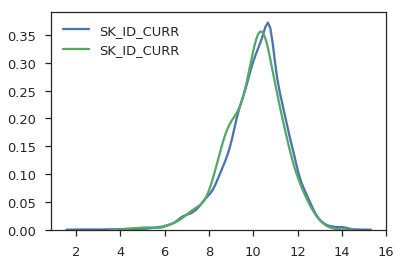

In [60]:
sns.kdeplot(tmp[(tmp > 0) & (app_train.TARGET == 0)].map(np.log1p))
sns.kdeplot(tmp[(tmp > 0) & (app_train.TARGET == 1)].map(np.log1p));

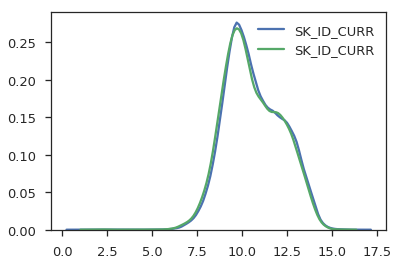

In [61]:
sns.kdeplot((-tmp[(tmp < 0) & (app_train.TARGET == 0)]).map(np.log1p))
sns.kdeplot((-tmp[(tmp < 0) & (app_train.TARGET == 1)]).map(np.log1p));

## Treat status as string of characters

In [6]:
%%time

first_character = bureau_bal.groupby(['SK_ID_BUREAU'])['STATUS'].first()

CPU times: user 3min 59s, sys: 2.14 s, total: 4min 1s
Wall time: 4min 1s


In [9]:
res = bureau.SK_ID_BUREAU.map(first_character)
res[res.isnull()].shape[0] / len(res)

0.5488572780215657

In [21]:
tmp = bureau.groupby(['SK_ID_CURR', res]).size().unstack().fillna(0).astype(np.int).reset_index()
tmp.head()

SK_ID_BUREAU,SK_ID_CURR,0,1,2,3,4,5,C,X
0,100001,2,1,0,0,0,0,4,0
1,100002,2,0,0,0,0,0,6,0
2,100005,1,0,0,0,0,0,1,1
3,100010,0,0,0,0,0,0,2,0
4,100013,0,0,0,0,0,0,3,1


In [25]:
res = app_train.loc[:, ['SK_ID_CURR', 'TARGET']].merge(tmp, on='SK_ID_CURR', how='left')
res = res.fillna(0).astype(np.int)

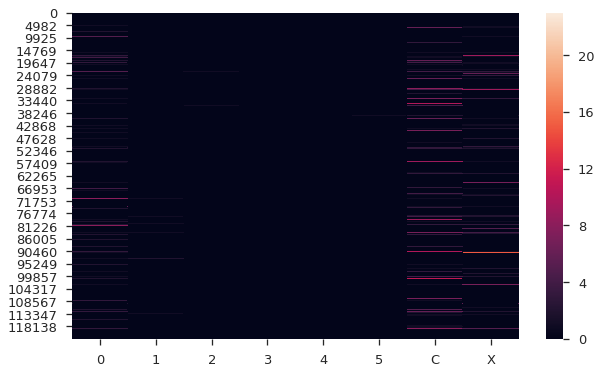

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(res[res.TARGET == 1].iloc[:10000, 2:]);

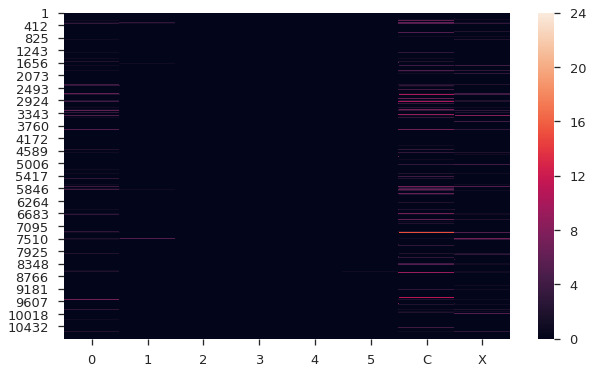

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(res[res.TARGET == 0].iloc[:10000, 2:]);